# Language Detection

Detecting and understanding which language has been inputed.

## Data Exploration

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import re
from nltk.corpus import stopwords # stopwords
from nltk.tokenize import word_tokenize

In [2]:
df = pd.read_csv('/Users/arandimallawa/Downloads/Language Project/dataset.csv',encoding='utf-8')

In [3]:
df

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [4]:
count = pd.DataFrame(df['language'].value_counts()).reset_index().rename(columns = {'index': "Languages", 'language': 'Data for Each Language'})
count

,Languages,Data for Each Language
0,Estonian,1000
1,Swedish,1000
2,English,1000
3,Russian,1000
4,Romanian,1000
5,Persian,1000
6,Pushto,1000
7,Spanish,1000
8,Hindi,1000
9,Korean,1000


In [5]:
df[df.language == 'Estonian'].sample(2)

,Text,language
14443,linnas on mitmeid teatreid siit on sirgunud pa...,Estonian
13353,kiusamist võib toime panna kas üks inimene-kiu...,Estonian


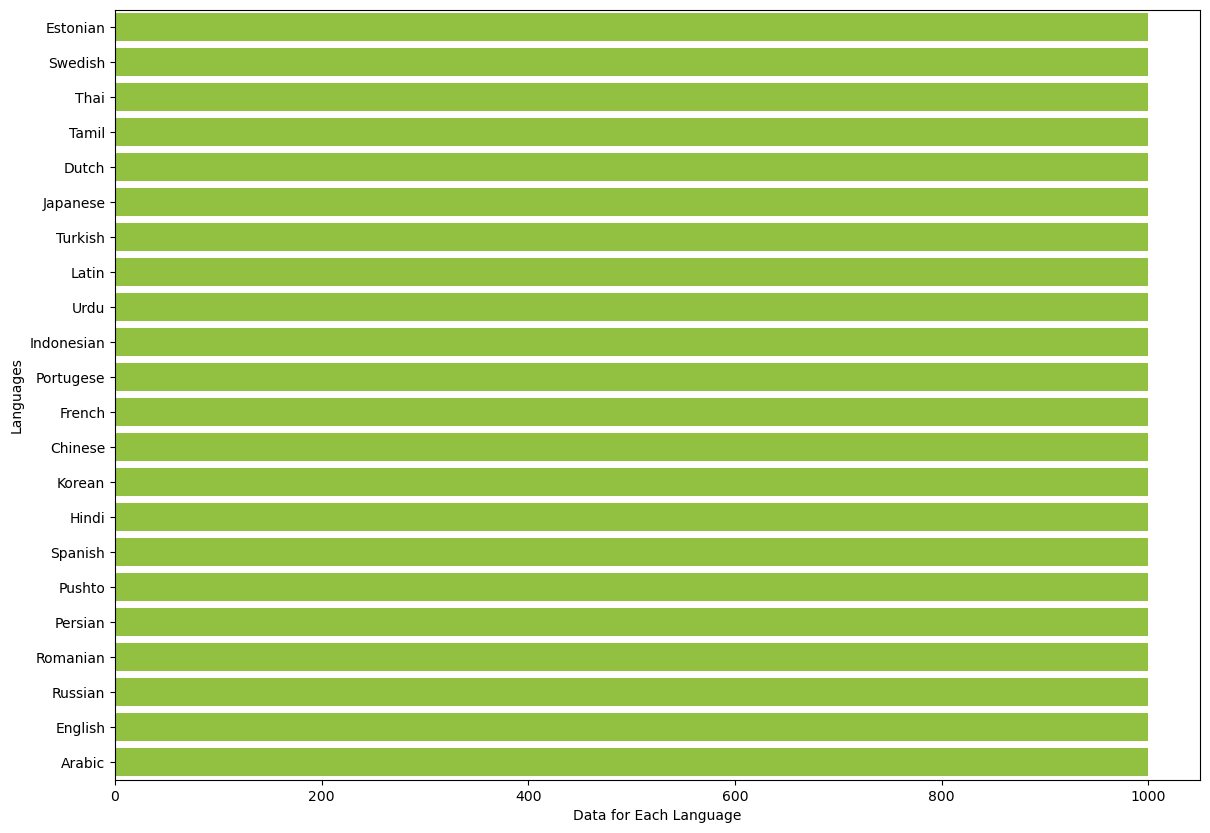

In [6]:
# Set the figure size
plt.figure(figsize=(14, 10))

# Reorder this data frame
count = count.sort_values(['Data for Each Language'], ascending=False).reset_index(drop=True)

# Make a barplot
sns.barplot(
    x="Data for Each Language", 
    y="Languages", 
    data=count, 
    color='#98d62d'
);

This dataset only contains 22 languages, so this is predictive model is not encompassing of all languages, but all major languages are accounted for. Each language has an equal number of data, this means that a particular language won't be over or under trainded in the predictive model.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


In [8]:
df.describe()

,Text,language
count,22000,22000
unique,21859,22
top,haec commentatio automatice praeparata res ast...,Estonian
freq,48,1000


## Preprocessing 

In [9]:
df = df.drop_duplicates(subset='Text')

In [10]:
df.value_counts

<bound method DataFrame.value_counts of                                                     Text  language
0      klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1      sebes joseph pereira thomas  på eng the jesuit...   Swedish
2      ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3      விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4      de spons behoort tot het geslacht haliclona en...     Dutch
...                                                  ...       ...
21995  hors du terrain les années  et  sont des année...    French
21996  ใน พศ  หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...      Thai
21997  con motivo de la celebración del septuagésimoq...   Spanish
21998  年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...   Chinese
21999   aprilie sonda spațială messenger a nasa și-a ...  Romanian

[21859 rows x 2 columns]>

In [11]:
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [12]:
from nltk.stem import PorterStemmer
stopwords = stopwords.words('arabic') + stopwords.words('chinese')+ stopwords.words('dutch') + stopwords.words('english') + stopwords.words('french') + stopwords.words('indonesian') + stopwords.words('portuguese') + stopwords.words('romanian') + stopwords.words('russian') + stopwords.words('spanish') + stopwords.words('swedish') + stopwords.words('turkish') 
stopwords.extend(['\'', '.', ',', '\"', ':', ';', '!', '@', '#', '$', '%', '^', '&',
                 '*', '(', ')', '-', '_', '+', '=', '[', ']', '{', '}', '\\', '?', 
                 '/','>', '<', '|', ' '] )
def clean(text): 
    text = nltk.word_tokenize(text)
    words = [word.lower() for word in text if word not in stopwords] 
    words = [PorterStemmer().stem(word) for word in words]
    return " ".join(words)
df['clean_text'] = df['Text'].apply(clean)


lang = ['Russian','Hindi', 'Tamil','Arabic', 'Thai', 'Japanese', 'Urdu', 'Chinese', 'Korean', 'Pushto', 'Persian' ]
df['Text'] = df.apply(lambda row: re.sub(r'\s*[A-Za-z]+\b', '',row.Text ) if row.language in lang else row.Text, axis = 1)


/var/folders/8t/mpj0ycfs44b5rx8_57nc085r0000gn/T/ipykernel_6764/3832304965.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['Text'].apply(clean)
/var/folders/8t/mpj0ycfs44b5rx8_57nc085r0000gn/T/ipykernel_6764/3832304965.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df.apply(lambda row: re.sub(r'\s*[A-Za-z]+\b', '',row.Text ) if row.language in lang else row.Text, axis = 1)


In [13]:
df

,Text,language,clean_text
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,klement gottwaldi surnukeha palsameer ning pai...
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,sebe joseph pereira thoma eng jesuit sino-russ...
2,ถนนเจริญกรุง อักษรโรมัน เริ่มตั้งแต่ถนนสนามไชย...,Thai,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
4,de spons behoort tot het geslacht haliclona en...,Dutch,spon behoort geslacht haliclona behoort famili...
...,...,...,...
21995,hors du terrain les années et sont des année...,French,hor terrain anné anné crise championnat titr c...
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเด...
21997,con motivo de la celebración del septuagésimoq...,Spanish,motivo celebración septuagésimoquinto ° aniver...
21998,年月，當時還只有歲的她在美國出道，以-k名義推出首張英文《》，由美國的獨立廠牌·record...,Chinese,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《babi like》，由美國...


In [14]:
X = df['Text']
y = df['language']

In [15]:
#encode 
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(y)

In [16]:
lang = [i for i in range(22)]
lang = encoder.inverse_transform(lang)
lang = lang.tolist()
lang

['Arabic',
 'Chinese',
 'Dutch',
 'English',
 'Estonian',
 'French',
 'Hindi',
 'Indonesian',
 'Japanese',
 'Korean',
 'Latin',
 'Persian',
 'Portugese',
 'Pushto',
 'Romanian',
 'Russian',
 'Spanish',
 'Swedish',
 'Tamil',
 'Thai',
 'Turkish',
 'Urdu']

## Making the Model

I want to classify languages, so I think a Logistic Regression would be best because our desired output is categorical. 

When deciding a particular pedecitive model it is imparative to look at a couple important facts: \
    1. Type of Machine Learning Algorithm : Superivised Learning  \
    2. Type of Data: Categorical \
    3. Goal: Classification \
With the following aspects outlined, the best model to fit the data is going to be a Logist Regression. 

### Logistic Regression

In [17]:
#Vectorize 
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(X)

# changing the datatype of the number into uint8 to consume less memory
X = X.astype('uint8') # uint8 and float32

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.30, random_state = 34)

In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import classification_report 
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9501372369624885

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       299
           1       0.92      0.57      0.70       287
           2       1.00      0.98      0.99       312
           3       0.95      0.98      0.97       309
           4       0.98      0.96      0.97       305
           5       0.99      0.99      0.99       309
           6       1.00      0.99      0.99       303
           7       0.99      0.95      0.97       297
           8       0.51      0.95      0.66       296
           9       1.00      0.91      0.95       287
          10       0.98      0.94      0.96       296
          11       1.00      0.98      0.99       292
          12       0.99      0.98      0.98       309
          13       1.00      0.94      0.97       290
          14       1.00      0.98      0.99       269
          15       1.00      0.94      0.97       289
          16       0.99      0.98      0.99       280
          17       1.00    

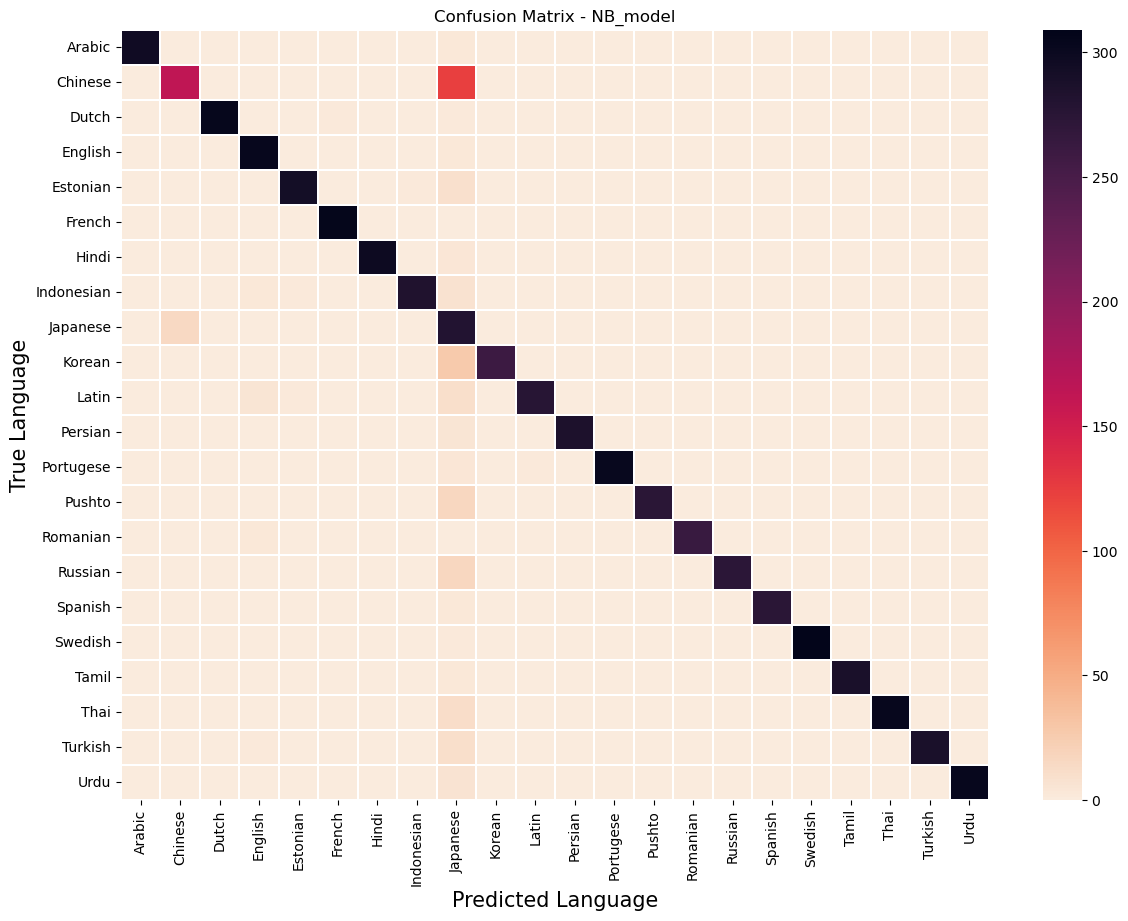

In [23]:
from matplotlib import *
import sys
import pylab as pl

cm = confusion_matrix(y_test, y_pred)
pl.figure(figsize=(14, 10))
pl.title('Confusion Matrix - NB_model')
sns.heatmap(cm, xticklabels=lang, yticklabels=lang, cmap='rocket_r', linecolor='white', linewidth=.005)
pl.xlabel('Predicted Language', fontsize=15)
pl.ylabel('True Language', fontsize=15)
pl.show()

## TfidfVecrizer

A pipeline just simplyfies the process of vectorizing and fitting a model. I know that a logistic regression is the best method, but I think we can clean and pre-process the data further, till it 

In [55]:
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import TfidfVectorizer
#Re-intializing X and y 
X = df['Text']
y = df['language']

#Splitting Data 
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.20, random_state = 34)

model = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1,3), analyzer='char')),
    ('clf', LogisticRegression())
])

model.fit(X_train,y_train)



Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', LogisticRegression())])

In [56]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print("Accuracy is :",accuracy)

Accuracy is : 0.9821591948764867


In [59]:
def pred(text):
    lang = model.predict([text])
    print('The Language is in', lang[0] )

pred("توففحص نموذج الكشف عن اللغة")

The Language is in Arabic


## Testing 

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import TfidfVectorizer
#Re-intializing X and y 
X = df['Text']
y = df['language']

#Splitting Data 
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.20, random_state = 34)

model_two = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1,4), analyzer='char')),
    ('clf', LogisticRegression())
])

model_two.fit(X_train,y_train)

y_pred = model_two.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print("Accuracy is :",accuracy)


def pred_two(text):
    lang = model_two.predict([text])
    print('The Language is in', lang[0] )

pred_two("توففحص نموذج الكشف عن اللغة")